In [12]:
import numpy as np
import matplotlib.pyplot as plt

import pickle as pkl
from multihist import Histdd

import flamedisx as fd

import os

In [13]:
pdfs = [dict(), dict()]

In [14]:
xlzd_source = fd.xlzd.XLZDERSource(configuration='60t')

cS1_min = xlzd_source.cS1_min
cS1_max = xlzd_source.cS1_max
log10_cS2_min = xlzd_source.log10_cS2_min
log10_cS2_max = xlzd_source.log10_cS2_max

c:\users\damie\documents\cours\stagem1\flamedisx\flamedisx\source.py:271: UserWarning: Defaults for unused settings ignored: {'configuration': '60t'}
  warnings.warn(f"Defaults for unused settings ignored: {unused}")


In [15]:
conditions = 'good'
drift_field_V_cm = 80.
gas_field_kV_cm = 7.5
elife_ns = 10000e3
g1 = 0.27

# conditions = 'bad'
# drift_field_V_cm = 25.
# gas_field_kV_cm = 6.
# elife_ns = 10000e3
# g1 = 0.27

In [16]:
Mig_Solar = fd.xlzd.XLZDvMigSolarSource(configuration='60t',
                                                  drift_field_V_cm=drift_field_V_cm, gas_field_kV_cm=gas_field_kV_cm,
                                                  elife_ns=elife_ns, g1=g1)

c:\users\damie\documents\cours\stagem1\flamedisx\flamedisx\source.py:271: UserWarning: Defaults for unused settings ignored: {'configuration': '60t'}
  warnings.warn(f"Defaults for unused settings ignored: {unused}")


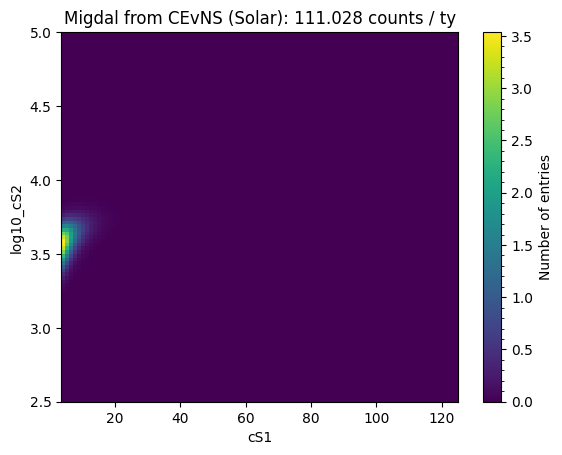

In [17]:
Mig_Solar_LNGS_hist = Histdd(bins=100, range=[[cS1_min, cS1_max], [log10_cS2_min, log10_cS2_max]], axis_names=['cS1', 'log10_cS2'])

Mig_Solar_LNGS_data = Mig_Solar.simulate(int(1e7))

Mig_Solar_LNGS_hist.add(Mig_Solar_LNGS_data['cs1'], np.log10(Mig_Solar_LNGS_data['cs2']))

Mig_Solar_LNGS_mu = Mig_Solar.estimate_mu(n_trials=int(1e7))
Mig_Solar_LNGS_hist.histogram = Mig_Solar_LNGS_hist.histogram / Mig_Solar_LNGS_hist.n * Mig_Solar_LNGS_mu

Mig_Solar_LNGS_hist.plot()
plt.title(f'Migdal from CEvNS (Solar): {Mig_Solar_LNGS_mu:.3f} counts / ty')

pdfs[1]['Mig_Solar_LNGS'] = Mig_Solar_LNGS_hist

In [18]:
CEvNS_Solar = fd.xlzd.XLZDvNRSolarSource(configuration='60t',
                                                  drift_field_V_cm=drift_field_V_cm, gas_field_kV_cm=gas_field_kV_cm,
                                                  elife_ns=elife_ns, g1=g1)

c:\users\damie\documents\cours\stagem1\flamedisx\flamedisx\source.py:271: UserWarning: Defaults for unused settings ignored: {'configuration': '60t'}
  warnings.warn(f"Defaults for unused settings ignored: {unused}")


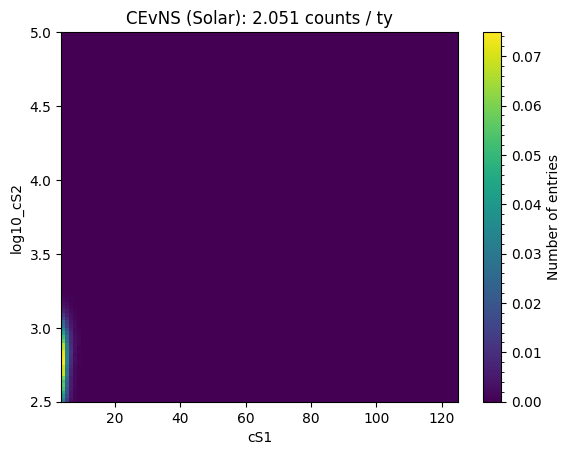

In [19]:
CEvNS_other_LNGS_hist = Histdd(bins=100, range=[[cS1_min, cS1_max], [log10_cS2_min, log10_cS2_max]], axis_names=['cS1', 'log10_cS2'])

CEvNS_other_LNGS_data = CEvNS_Solar.simulate(int(1e7))

CEvNS_other_LNGS_hist.add(CEvNS_other_LNGS_data['cs1'], np.log10(CEvNS_other_LNGS_data['cs2']))

CEvNS_other_LNGS_mu = CEvNS_Solar.estimate_mu(n_trials=int(1e7))
CEvNS_other_LNGS_hist.histogram = CEvNS_other_LNGS_hist.histogram / CEvNS_other_LNGS_hist.n * CEvNS_other_LNGS_mu

CEvNS_other_LNGS_hist.plot()
plt.title(f'CEvNS (Solar): {CEvNS_other_LNGS_mu:.3f} counts / ty')

pdfs[1]['CEvNS_other_LNGS'] = CEvNS_other_LNGS_hist